In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Medicaldataset.csv")

In [4]:
#shape of the dataset
df.shape

(1319, 9)

In [5]:
# Datatype of each column in dataframe
df.dtypes

,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


In [6]:
#Data Cleaning Steps
# Missing value detection
df.isna().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


#There is no need to deal with data missing as there is no missing data.

In [7]:
#Find % of null values in datasets
print(df.isna().sum()/len(df)*100, '\n')

Age                         0.0
Gender                      0.0
Heart rate                  0.0
Systolic blood pressure     0.0
Diastolic blood pressure    0.0
Blood sugar                 0.0
CK-MB                       0.0
Troponin                    0.0
Result                      0.0
dtype: float64 



In [8]:
#find all the symbol or character in the dataset which should not be part of the column, find for all columns

import string

# Function to find non-standard characters in a column
def find_non_standard_chars(df, column):
    # Define allowed characters (letters, numbers, whitespace, common punctuation)
    allowed_chars = string.ascii_letters + string.digits + string.whitespace + string.punctuation

    # Initialize a set to store unique non-standard characters
    non_standard_chars = set()

    # Iterate through each value in the column
    for value in df[column].dropna(): # Use dropna to skip NaN values
        # Convert value to string (handle potential non-string data types)
        value_str = str(value)
        # Check each character in the string
        for char in value_str:
            if char not in allowed_chars:
                non_standard_chars.add(char)
    return non_standard_chars

# Iterate through all columns in the DataFrame
for col in df.columns:
    non_standard_chars_in_col = find_non_standard_chars(df, col)
    if non_standard_chars_in_col:
        print(f"Non-standard characters found in column '{col}': {non_standard_chars_in_col}")
    else:
        print(f"No non-standard characters found in column '{col}' (or column is empty/contains only standard chars).")

No non-standard characters found in column 'Age' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Gender' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Heart rate' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Systolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Diastolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Blood sugar' (or column is empty/contains only standard chars).
No non-standard characters found in column 'CK-MB' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Troponin' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Result' (or column is empty/contains only standard chars).


In [9]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
#Questions to Answers
#1. what percentage of people has heart attack risk?
#2.how this risk is distributed in male and female?
#3.what is the age group which most patient are falling for heart attack?
#4.what is the avg heart rate,bp,blood suger for positive patient
#5. what is avg CKMB and troponin for positive patient?

#Recomendation
#How many people are in the border for the reaching health risk.
#1.


In [12]:
result_count=df["Result"].value_counts()
overall=result_count.sum()

positive_percentage = (result_count["positive"] / overall) * 100
negative_percentage = (result_count["negative"] / overall) * 100

print(f"Percentage of positive results: {positive_percentage:.2f}%")
print(f"Percentage of negative results: {negative_percentage:.2f}%")

Percentage of positive results: 61.41%
Percentage of negative results: 38.59%


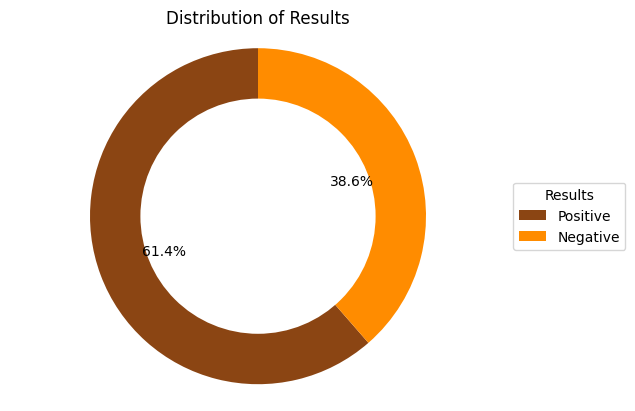

In [13]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['saddlebrown', 'darkorange']

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
                                   startangle=90)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Results')
plt.legend(wedges, labels,
           title="Results",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [14]:
df.groupby('Result')['Age'].describe()
df.groupby('Result').mean()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Result,,,,,,,,
negative,52.094303,0.603143,77.886051,127.856582,72.440079,149.757760,2.555344,0.026988
positive,58.766667,0.695062,78.619753,126.739506,72.161728,144.671605,23.266838,0.570798


Here CKMB levels are high for the positive patience , this can be a positive factor to predict the heart attack.

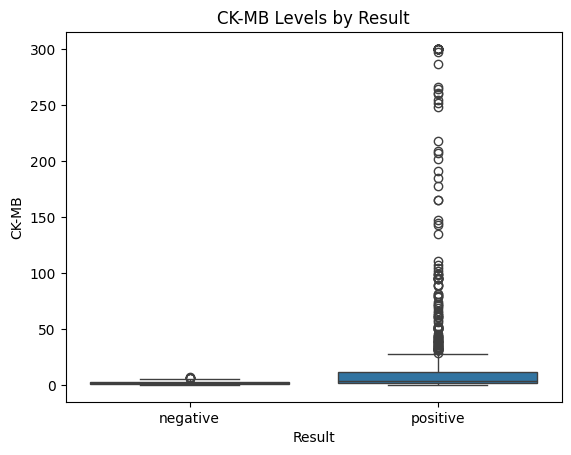

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of CK-MB levels by Result
sns.boxplot(x='Result', y='CK-MB', data=df)

# Optional formatting
plt.title('CK-MB Levels by Result')
plt.xlabel('Result')
plt.ylabel('CK-MB')
plt.show()


Clear difference in CK-MB levels between negative and positive result groups.

The positive group has significantly higher CK-MB values on average and much more variability.

The presence of many extreme outliers suggests that CK-MB could be a strong indicator or biomarker linked to the positive result condition (e.g., myocardial damage, if this is cardiac data).

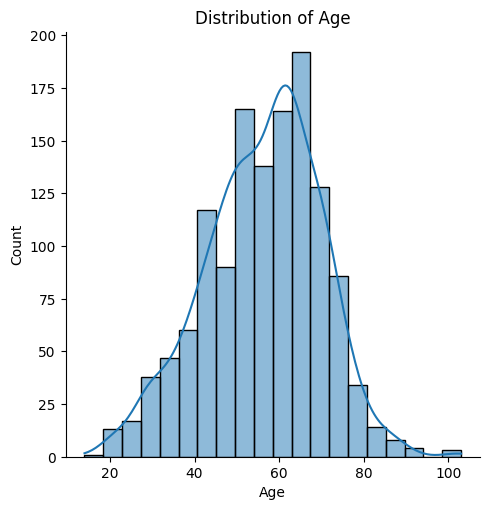

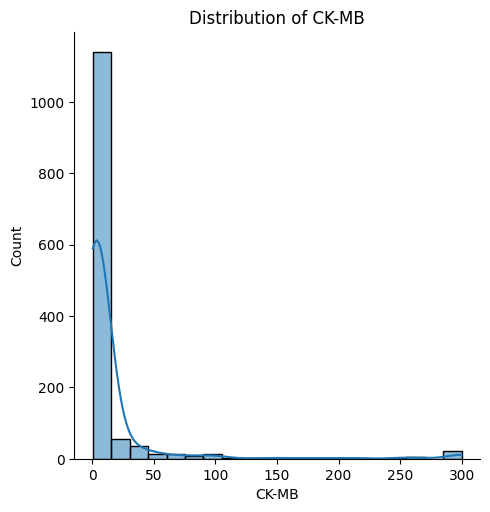

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for Age
sns.displot(data=df, x='Age', kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

# Plot histogram for Troponin
sns.displot(data=df, x='CK-MB', kde=True, bins=20)
plt.title('Distribution of CK-MB')
plt.show()


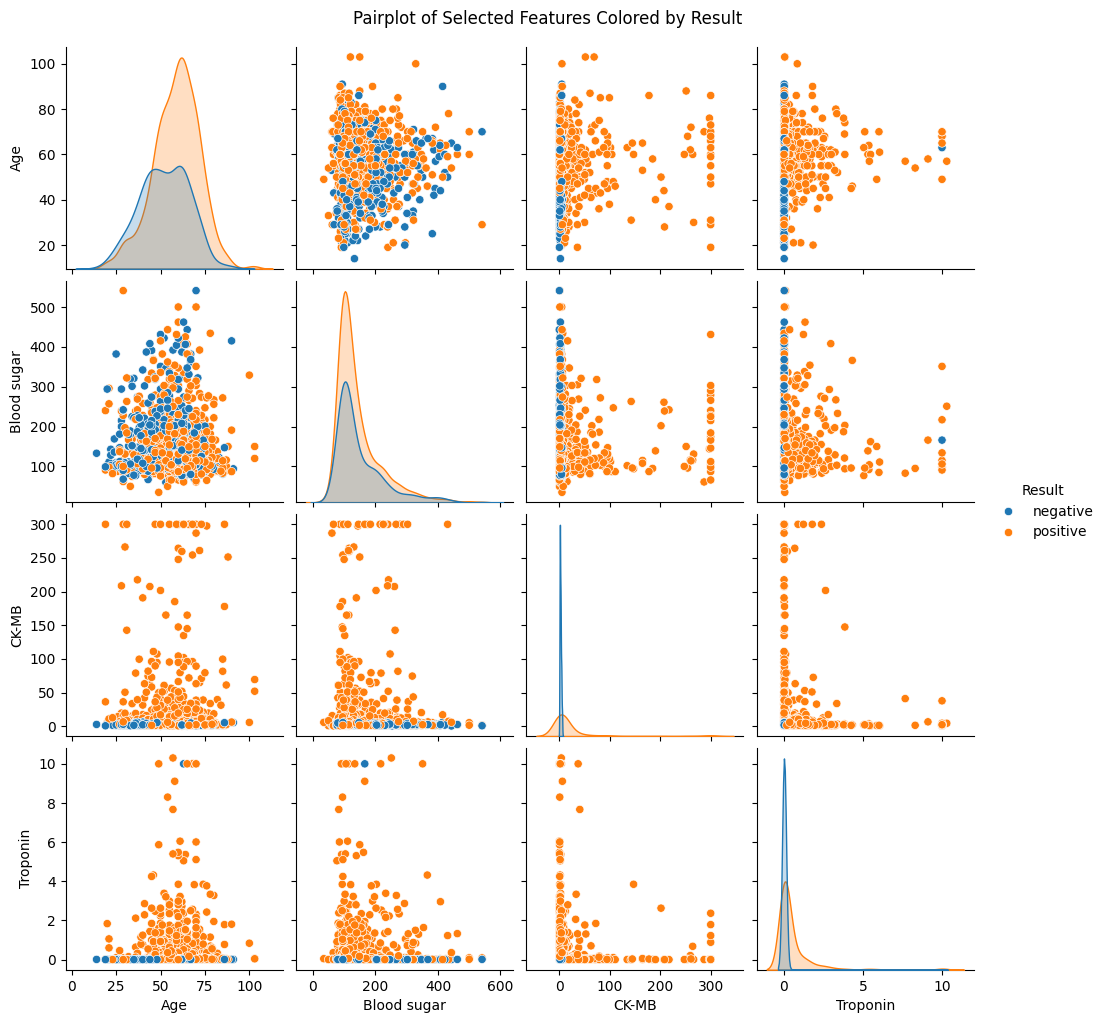

In [21]:
# Select variables of interest
features = ['Age', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

# Generate pairplot
sns.pairplot(data=df[features], hue='Result', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Result', y=1.02)
plt.show()
